# Chapter 11: Testing with Out-of-Sample Data

In [1]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/nnfs')
os.chdir('/home/yutanagano/Projects/nnfs')

In [2]:
import numpy as np
import nnfs
from nnfs.datasets import sine_data

nnfs.init()

import nnn

## Setup

In [3]:
# Create dataset
X, y = sine_data()

# Create the necessary layers
dense1 = nnn.layer.Dense(n_inputs=1, n_neurons=64)
activation1 = nnn.activation.Relu()
dense2 = nnn.layer.Dense(n_inputs=64, n_neurons=64)
activation2 = nnn.activation.Relu()
dense3 = nnn.layer.Dense(n_inputs=64, n_neurons=1)
activation3 = nnn.activation.Linear()

loss_fn = nnn.loss.MeanSquaredError()

# Create the optimiser
optimiser = nnn.optimiser.Adam()

accuracy_precision = np.std(y) / 250

## Training

In [4]:
# Training loop
for epoch in range(10001):
    # Forward pass
    output = dense1.forward(X)
    output = activation1.forward(output)
    output = dense2.forward(output)
    output = activation2.forward(output)
    output = dense3.forward(output)
    output = activation3.forward(output)

    # Calculate the network's current loss
    data_loss = loss_fn.calculate(output, y)
    reg_loss = loss_fn.regularsiation_loss(dense1) +\
        loss_fn.regularsiation_loss(dense2) +\
        loss_fn.regularsiation_loss(dense3)
    loss = data_loss + reg_loss

    # Calculate accuracy
    accuracy = np.mean(np.absolute(output - y) < accuracy_precision)

    # Print accuracy
    if not epoch % 100: print(
        f"epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f}, "
        f"(data_loss: {data_loss:.3f}, reg_loss: {reg_loss:3f}), "
        f"lr: {optimiser.current_learning_rate}"
    )

    # Backward pass
    loss_fn.backward(output, y)
    activation3.backward(loss_fn.dinputs)
    dense3.backward(activation3.dinputs)
    activation2.backward(dense3.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimiser.pre_update_params()
    optimiser.update_params(dense1)
    optimiser.update_params(dense2)
    optimiser.post_update_params()

epoch: 0, acc: 0.002, loss: 0.500, (data_loss: 0.500, reg_loss: 0.000000), lr: 0.001
epoch: 100, acc: 0.003, loss: 0.318, (data_loss: 0.318, reg_loss: 0.000000), lr: 0.001
epoch: 200, acc: 0.004, loss: 0.100, (data_loss: 0.100, reg_loss: 0.000000), lr: 0.001
epoch: 300, acc: 0.023, loss: 0.064, (data_loss: 0.064, reg_loss: 0.000000), lr: 0.001
epoch: 400, acc: 0.036, loss: 0.050, (data_loss: 0.050, reg_loss: 0.000000), lr: 0.001
epoch: 500, acc: 0.047, loss: 0.034, (data_loss: 0.034, reg_loss: 0.000000), lr: 0.001
epoch: 600, acc: 0.053, loss: 0.021, (data_loss: 0.021, reg_loss: 0.000000), lr: 0.001
epoch: 700, acc: 0.061, loss: 0.012, (data_loss: 0.012, reg_loss: 0.000000), lr: 0.001
epoch: 800, acc: 0.130, loss: 0.007, (data_loss: 0.007, reg_loss: 0.000000), lr: 0.001
epoch: 900, acc: 0.225, loss: 0.004, (data_loss: 0.004, reg_loss: 0.000000), lr: 0.001
epoch: 1000, acc: 0.296, loss: 0.003, (data_loss: 0.003, reg_loss: 0.000000), lr: 0.001
epoch: 1100, acc: 0.349, loss: 0.002, (data_

## Validation

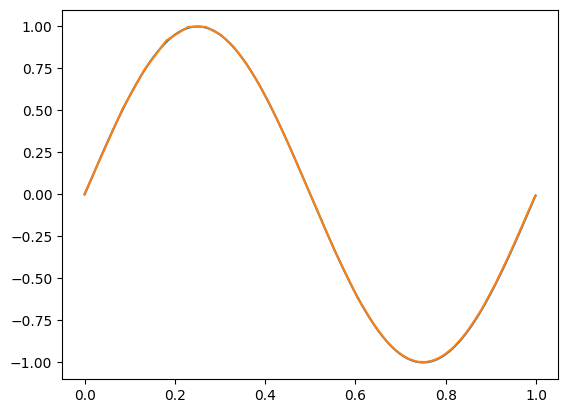

In [5]:
import matplotlib.pyplot as plt

X_test, y_test = sine_data()

output = dense1.forward(X_test)
output = activation1.forward(output)
output = dense2.forward(output)
output = activation2.forward(output)
output = dense3.forward(output)
output = activation3.forward(output)

plt.plot(X_test, y_test)
plt.plot(X_test, output)
plt.show()